# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [3]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [4]:
rows, cols = df_tesla.shape
print('Shape of Tesla DataFrame.')
print(f'Number of rows: {rows}\n\
Number of columns:{cols}')

Shape of Tesla DataFrame.
Number of rows: 124
Number of columns:3


In [5]:
print("Columns at the Tesla DataFrame:")
df_tesla.columns.values

Columns at the Tesla DataFrame:


array(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype=object)

In [6]:
max_web_search = df_tesla.TSLA_WEB_SEARCH.max()
min_web_search = df_tesla.TSLA_WEB_SEARCH.min()
print(f'Largest value for Tesla in Web Search: {max_web_search}')
print(f'Smallest value for Tesla in Web Search: {min_web_search}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [7]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [8]:
rows, cols = df_unemployment.shape
print('Shape of Unemployment DataFrame.')
print(f'Number of rows: {rows}')
print(f'Number of columns:{cols}')

Shape of Unemployment DataFrame.
Number of rows: 181
Number of columns:3


In [9]:
print("Columns at the Unemployment DataFrame:")
df_unemployment.columns.values

Columns at the Unemployment DataFrame:


array(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype=object)

In [10]:
max_ben = df_unemployment.UE_BENEFITS_WEB_SEARCH.max()
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {max_ben}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [11]:
rows, cols = df_btc_search.shape
print('Shape of BTC DataFrame.')
print(f'Number of rows: {rows}\n\
Number of columns:{cols}')

Shape of BTC DataFrame.
Number of rows: 73
Number of columns:2


In [12]:
print("Columns at the BTC_Search DataFrame:")
df_btc_search.columns.values

Columns at the BTC_Search DataFrame:


array(['MONTH', 'BTC_NEWS_SEARCH'], dtype=object)

In [13]:
max_btc_search = df_btc_search.BTC_NEWS_SEARCH.max()
print(f'largest BTC News Search: {max_btc_search}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [14]:
nan_tesla = df_tesla.isnull().values.any()
nan_unemployment = df_unemployment.isnull().values.any()
nan_btc_search = df_btc_search.isnull().values.any()

print(f'Missing values for Tesla?: {nan_tesla}')
print(f'Missing values for U/E?: {nan_unemployment}')
print(f'Missing values for BTC Search?: {nan_btc_search}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [15]:
nan_btc_price = df_btc_price.isnull().values.any()
print(f'Missing values for BTC price?: {nan_btc_price}')

Missing values for BTC price?: True


In [16]:
nan_btc_price_total = df_btc_price.isnull().values.sum()
print(f'Number of missing values: \n{nan_btc_price_total}')

Number of missing values: 
2


Hunting down the row with strange information:

In [17]:
df_btc_price[df_btc_price.VOLUME.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [18]:
df_btc_price[df_btc_price.CLOSE.isna()]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [19]:
df_btc_price.dropna(inplace=True)
nan_btc_price = df_btc_price.isnull().values.any()
print(f'Missing values for BTC price after cleaning?: \n{nan_btc_price}')

Missing values for BTC price after cleaning?: 
False


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

Checking the type of information under columns of time

In [20]:
print(f'Tesla: {df_tesla.MONTH.dtype}')
print(f'Unemployment: {df_unemployment.MONTH.dtype}')
print(f'BTC search: {df_btc_search.MONTH.dtype}')
print(f'BTC price: {df_btc_price.DATE.dtype}')

Tesla: object
Unemployment: object
BTC search: object
BTC price: object


In [21]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

Cross checking that they are now datetime objects:

In [22]:
print(f'Tesla: {df_tesla.MONTH.dtype}')
print(f'Unemployment: {df_unemployment.MONTH.dtype}')
print(f'BTC search: {df_btc_search.MONTH.dtype}')
print(f'BTC price: {df_btc_price.DATE.dtype}')

Tesla: datetime64[ns]
Unemployment: datetime64[ns]
BTC search: datetime64[ns]
BTC price: datetime64[ns]


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

BTC prices gives information by day. In order to have a information by month, one resample the data with a certain periodicity and criterion. 

In [23]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean() #Retunrs the month against its average
df_btc_monthly = df_btc_price.resample('M', on='DATE').last() #Retunrs the month against its last value
df_btc_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [24]:
df_btc_monthly.shape

(73, 3)

# Data Visualisation

### Notebook Formatting & Style Helpers

In [25]:
import matplotlib.dates as mdates

In [26]:
# Create locators for ticks on the time axis

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [27]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

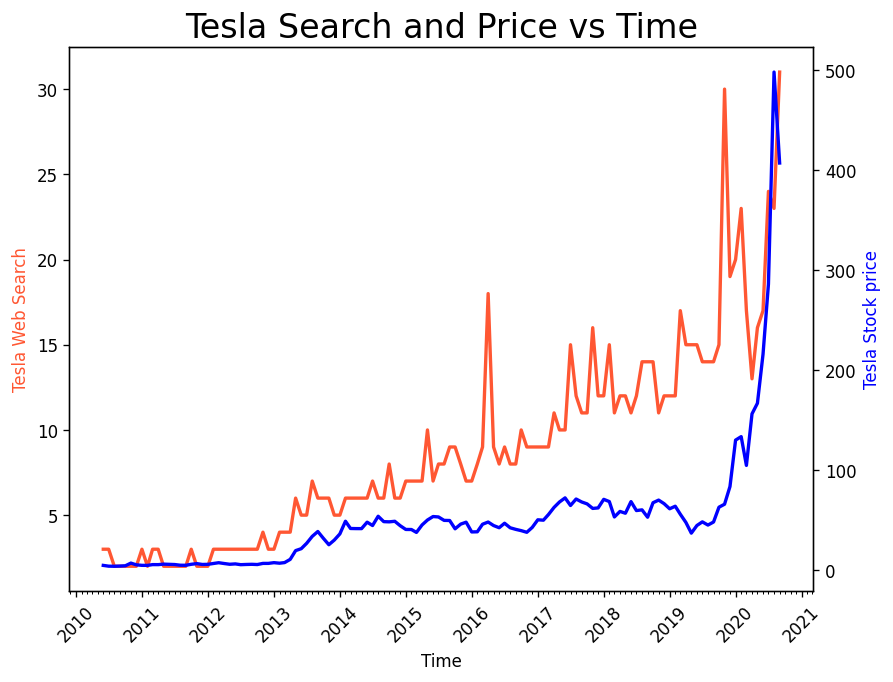

In [42]:
figure_tesla = plt.figure(figsize=(8, 6), dpi=120)

plt.xticks(rotation=45)
plt.title('Tesla Search and Price vs Time', fontsize=20 )
ax1 = plt.gca()
ax2 = ax1.twinx()
color_ax1 = '#FF5733'
color_ax2 = 'b'


ax1.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color=color_ax1, linewidth=2)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color=color_ax2, linewidth=2)

ax1.set_ylabel('Tesla Web Search', color=color_ax1)
ax2.set_ylabel('Tesla Stock price', color=color_ax2)
ax1.set_xlabel('Time')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

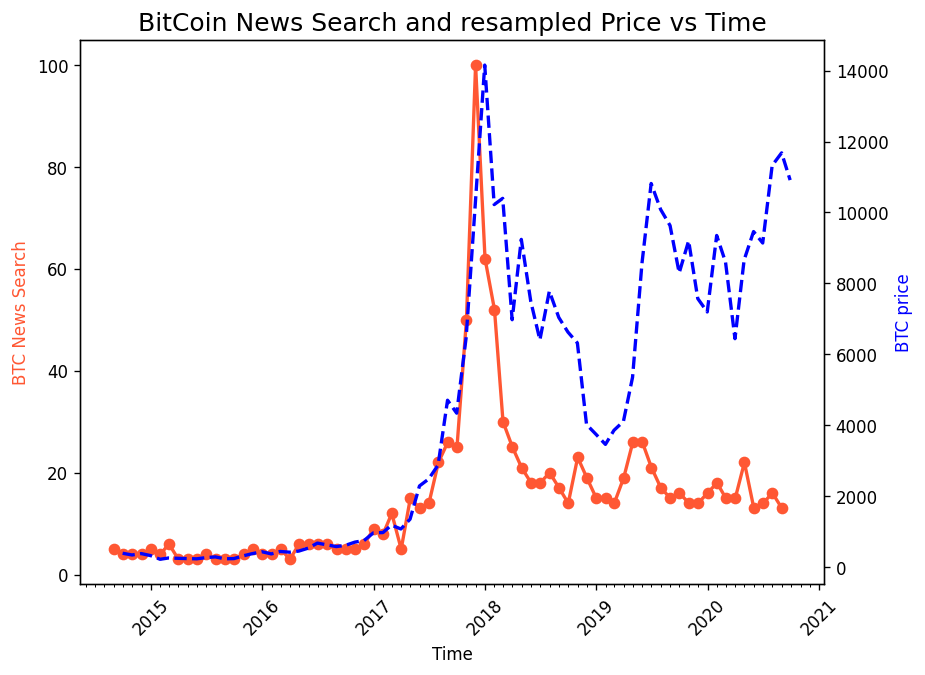

In [55]:
figure_btc = plt.figure(figsize=(8, 6), dpi=120)

plt.xticks(rotation=45)
plt.title('BitCoin News Search and resampled Price vs Time', fontsize=15)
ax1 = plt.gca()
ax2 = ax1.twinx()
color_ax1 = '#FF5733'
color_ax2 = 'b'


ax1.plot(df_btc_search.MONTH, df_btc_search.BTC_NEWS_SEARCH, color=color_ax1, linewidth=2, marker='o')
ax2.plot(df_btc_monthly.DATE, df_btc_monthly.CLOSE, color=color_ax2, linewidth=2, linestyle="--")

ax1.set_ylabel('BTC News Search', color=color_ax1)
ax2.set_ylabel('BTC price', color=color_ax2)
ax1.set_xlabel('Time')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

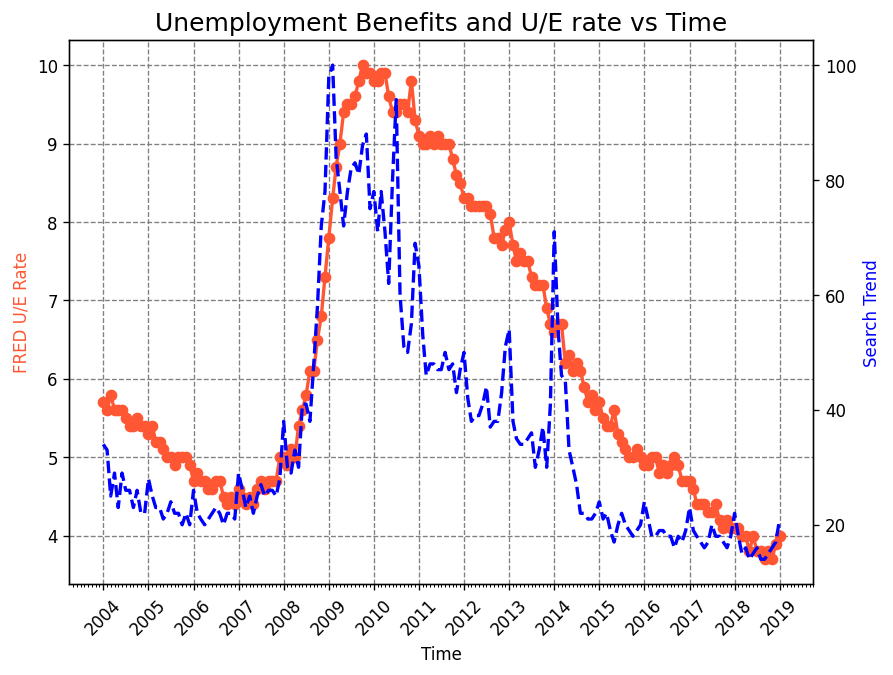

In [60]:
figure_unemployment = plt.figure(figsize=(8, 6), dpi=120)

plt.xticks(rotation=45)
plt.title('Unemployment Benefits and U/E rate vs Time', fontsize=15)
ax1 = plt.gca()
ax2 = ax1.twinx()
color_ax1 = '#FF5733'
color_ax2 = 'b'


ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color=color_ax1, linewidth=2, marker='o')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color=color_ax2, linewidth=2, linestyle="--")

ax1.set_ylabel('FRED U/E Rate', color=color_ax1)
ax2.set_ylabel('Search Trend', color=color_ax2)
ax1.set_xlabel('Time')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


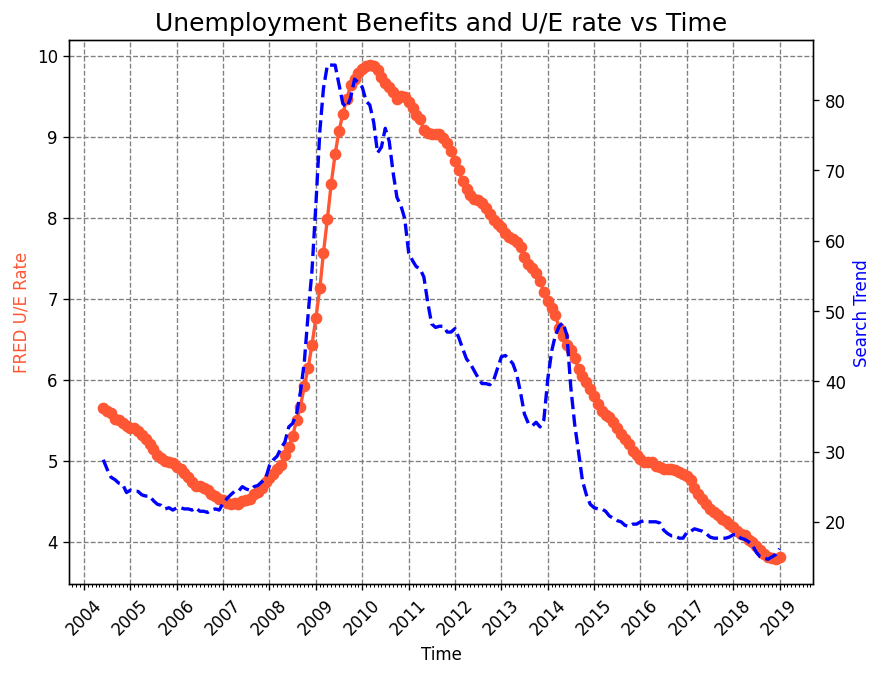

In [61]:
figure_unemployment = plt.figure(figsize=(8, 6), dpi=120)

plt.xticks(rotation=45)
plt.title('Unemployment Benefits and U/E rate vs Time', fontsize=15)
ax1 = plt.gca()
ax2 = ax1.twinx()
color_ax1 = '#FF5733'
color_ax2 = 'b'

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color=color_ax1, linewidth=2, marker='o')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color=color_ax2, linewidth=2, linestyle="--")

ax1.set_ylabel('FRED U/E Rate', color=color_ax1)
ax2.set_ylabel('Search Trend', color=color_ax2)
ax1.set_xlabel('Time')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='grey', linestyle='--')

plt.show()